In [1]:
pip install pandas; matplotlib; seaborn; scikit-learn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.1 MB 16.8 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 17.6 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 17.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 16.1 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached pytz-2024.2-py2.py3-none-any.whl (


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip list

Package                   VersionNote: you may need to restart the kernel to use updated packages.

------------------------- --------------
absl-py                   2.1.0
aiohttp                   3.9.3
aiosignal                 1.3.1
annotated-types           0.6.0
anyio                     4.2.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.2
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
dataclasses-json          0.6.4
debugpy                   1.8.2
decorator        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [14]:
commodity = "CORN"
data = pd.read_csv(f"data/{commodity}-Prices.csv")

data['Date'] = pd.to_datetime(data['Date'])

dates = [('2014-01-01', '2014-12-31'), ('2015-01-01', '2015-12-31'), ('2016-01-01', '2016-12-31'), ('2017-01-01', '2017-12-31'), ('2018-01-01', '2018-12-31'), ('2019-01-01', '2019-12-31'), ('2022-01-01', '2022-12-31'), ('2023-01-01', '2023-12-31'), ('2024-01-01', '2024-11-01')]
start_date = '2012-01-01'
end_date = '2019-12-31'
filtered = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

yearly_data = []
for start_date, end_date in dates:
    filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    yearly_data.append(filtered_data)

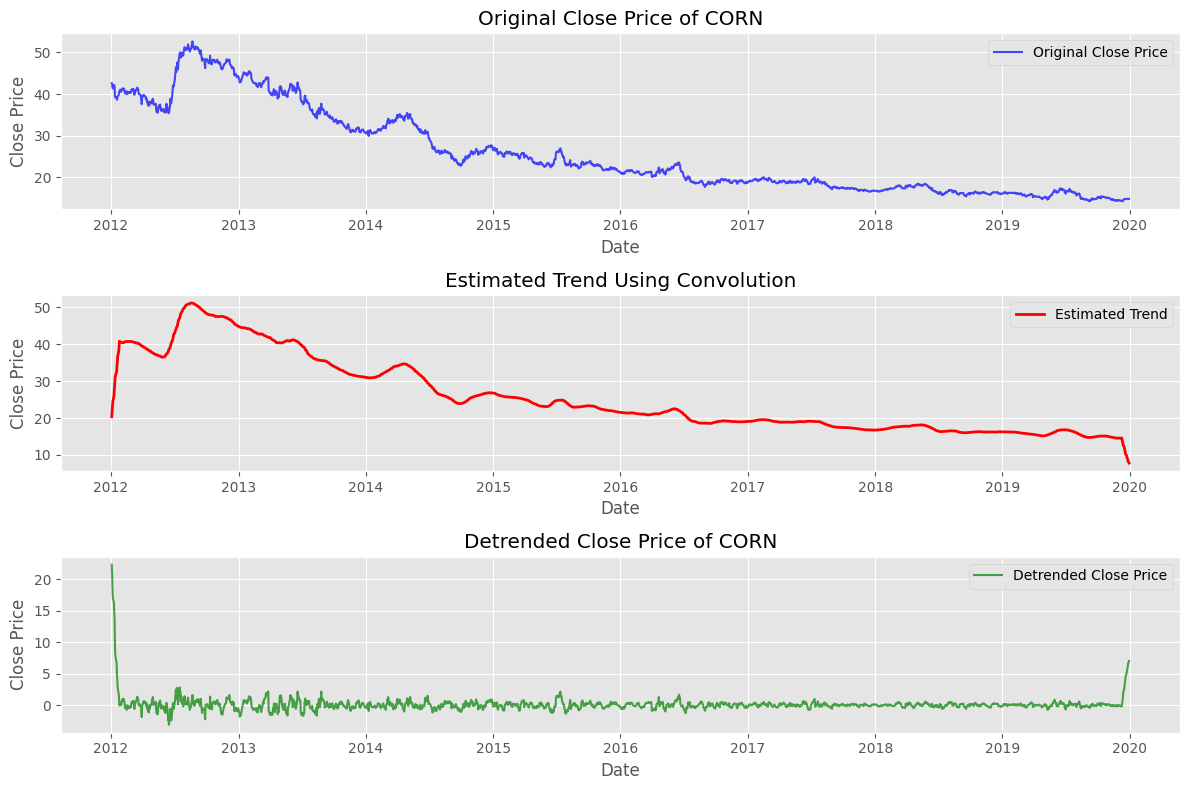

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Example: Detrend the first year's data
close_prices = filtered["Close"].values  # Extract Close prices as a NumPy array
dat = filtered["Date"]  # Extract corresponding dates

# Define a smoothing kernel (e.g., moving average kernel)
kernel_size = 30  # Size of the kernel (larger kernel = smoother trend)
kernel = np.ones(kernel_size) / kernel_size  # Uniform moving average kernel

# Apply convolution to estimate the trend
trend = convolve(close_prices, kernel, mode='same')  # 'same' mode preserves the original length

# Detrend the data by subtracting the trend
detrended_prices_for_main = close_prices - trend

# Plot the original data, trend, and detrended data
plt.figure(figsize=(12, 8))

# Plot original data
plt.subplot(3, 1, 1)
plt.plot(dat, close_prices, label='Original Close Price', color='blue', alpha=0.7)
plt.title(f'Original Close Price of {commodity}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Plot estimated trend
plt.subplot(3, 1, 2)
plt.plot(dat, trend, label='Estimated Trend', color='red', linewidth=2)
plt.title('Estimated Trend Using Convolution')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Plot detrended data
plt.subplot(3, 1, 3)
plt.plot(dat, detrended_prices_for_main, label='Detrended Close Price', color='green', alpha=0.7)
plt.title(f'Detrended Close Price of {commodity}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

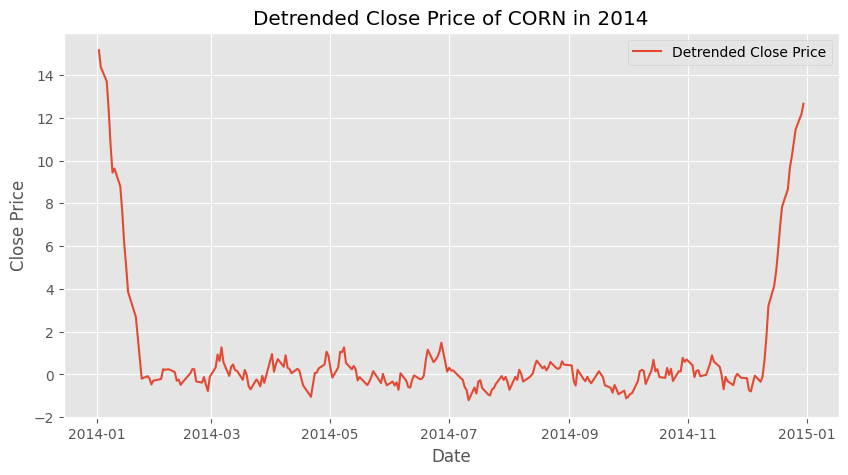

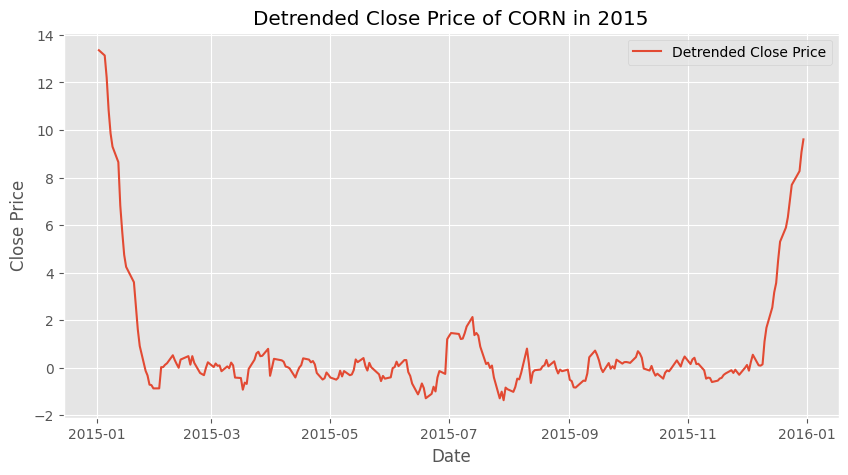

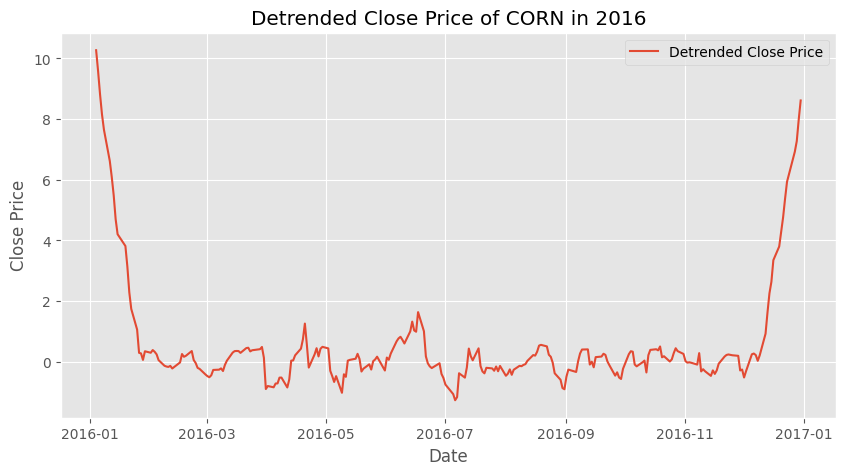

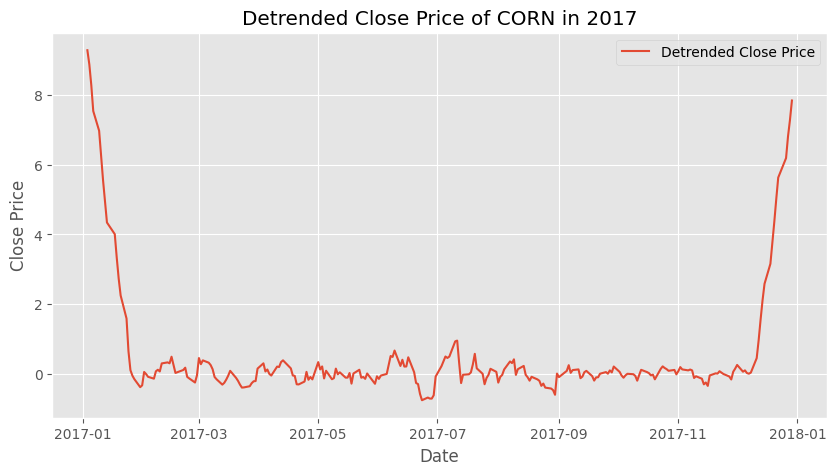

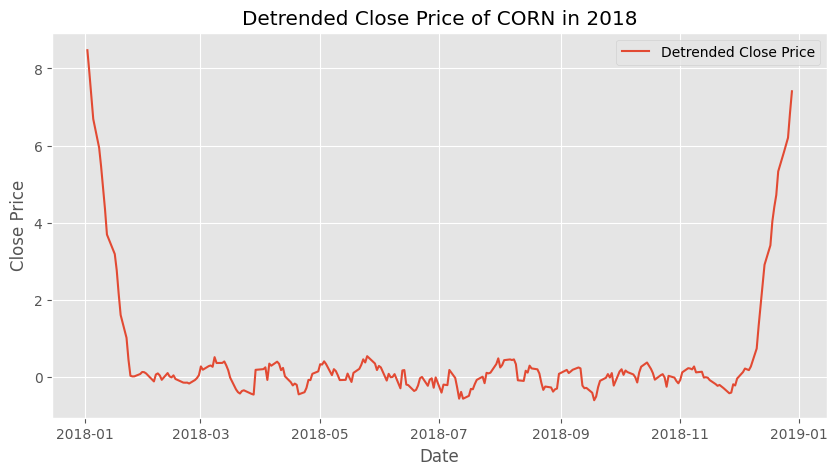

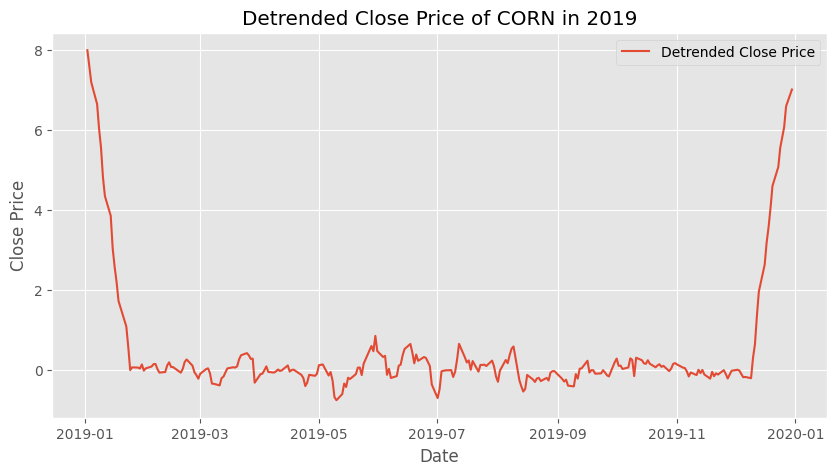

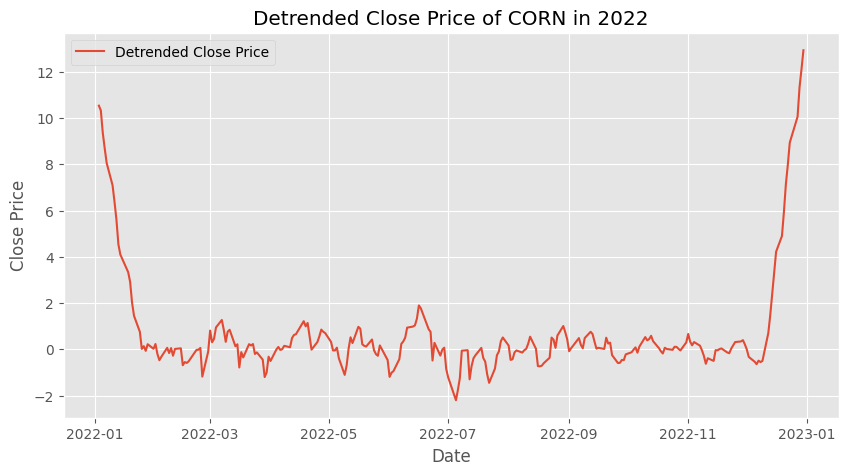

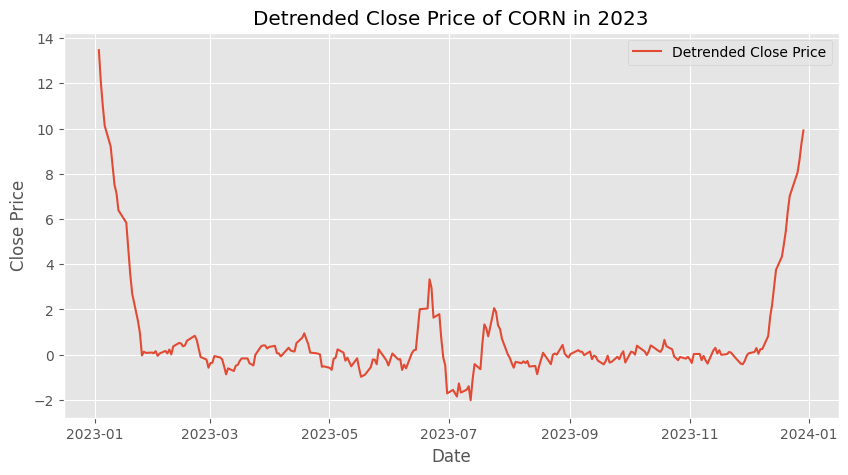

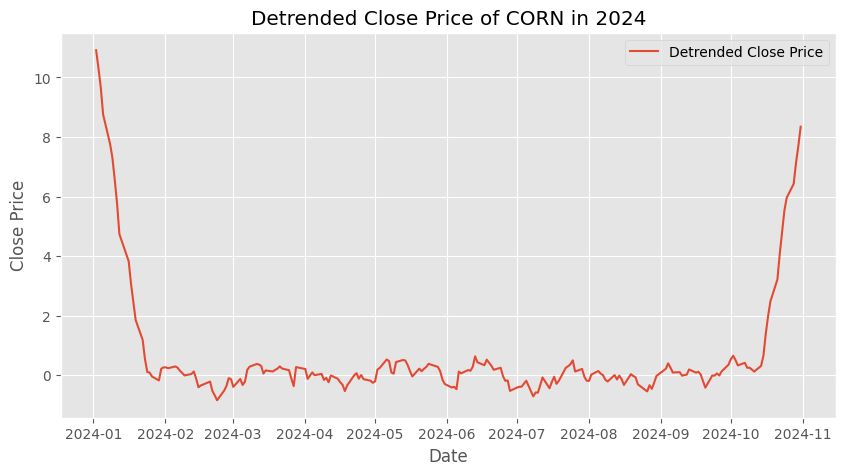

In [16]:

# Loop through each DataFrame in yearly_data and plot the Close price
yearly_detrended_prices = []
for i, df in enumerate(yearly_data):
    adder = 2014
    if i >= 6:
        adder = 2016
    close = df["Close"].values  # Extract Close prices for the current DataFrame
    days = df["Date"]  # Extract corresponding dates
    kernel_size = 30  # Size of the kernel (larger kernel = smoother trend)
    kernel = np.ones(kernel_size) / kernel_size  # Uniform moving average kernel
    
    # Apply convolution to estimate the trend
    trend = convolve(close, kernel, mode='same')  # Use 'close' instead of 'close_prices'
    
    # Detrend the data by subtracting the trend
    detrended_prices = close - trend  # Use 'close' instead of 'close_prices'
    yearly_detrended_prices.append(detrended_prices)
    
    # Plot the detrended data
    plt.figure(figsize=(10, 5))  # Create a new figure for each plot
    plt.plot(days, detrended_prices, label='Detrended Close Price')  # Plot Date vs Detrended Close
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Detrended Close Price of {commodity} in ' + str(i+adder))  # Use the year from the dates list
    plt.grid(True)  # Add a grid for better readability
    plt.legend()  # Add a legend
    plt.show()  # Display the plot

C:\Users\vivek\AppData\Local\Temp\ipykernel_29356\1352465495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Close"] = df['Close'] - rolling_mean


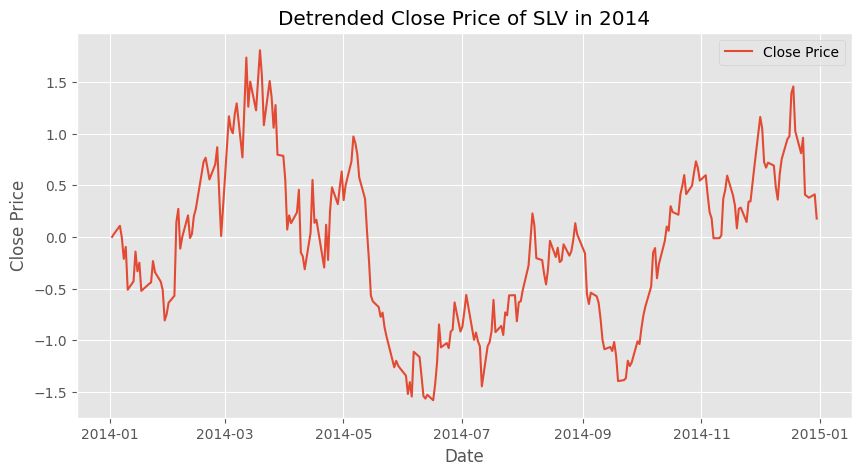

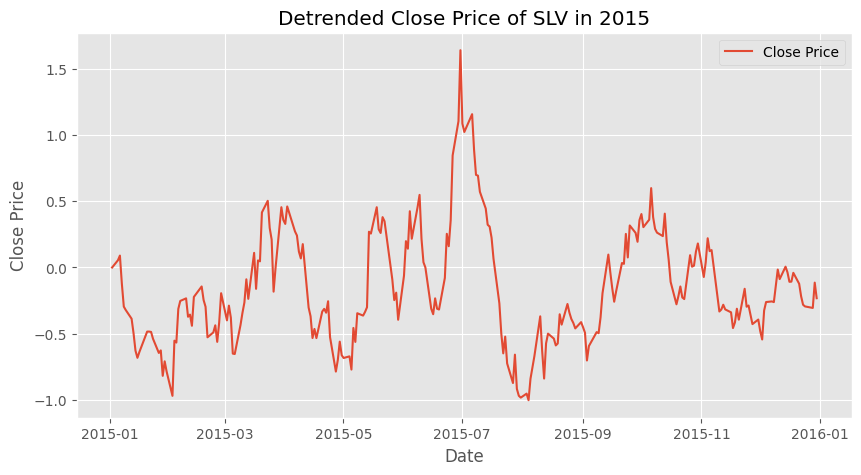

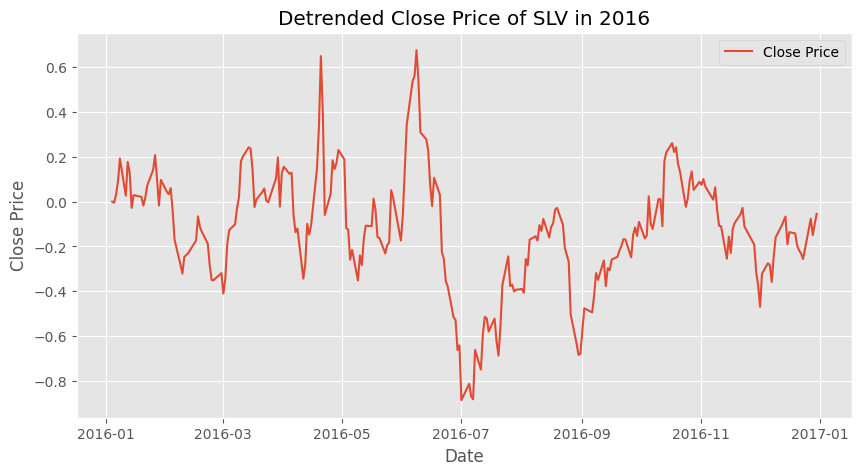

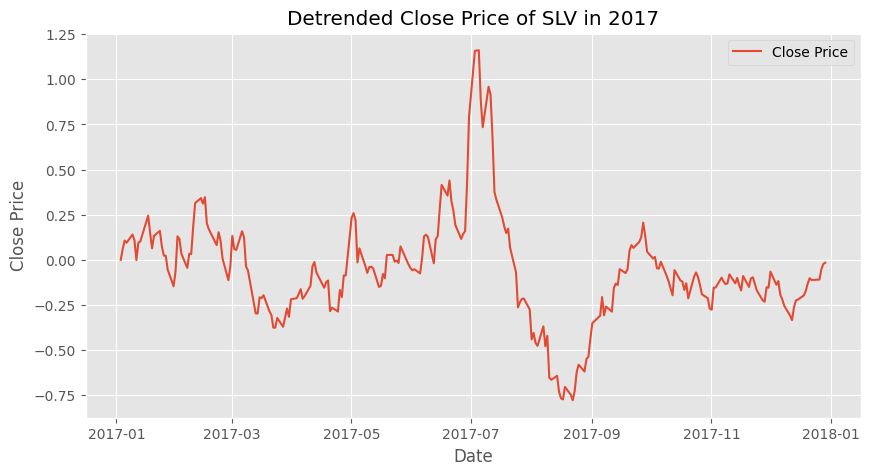

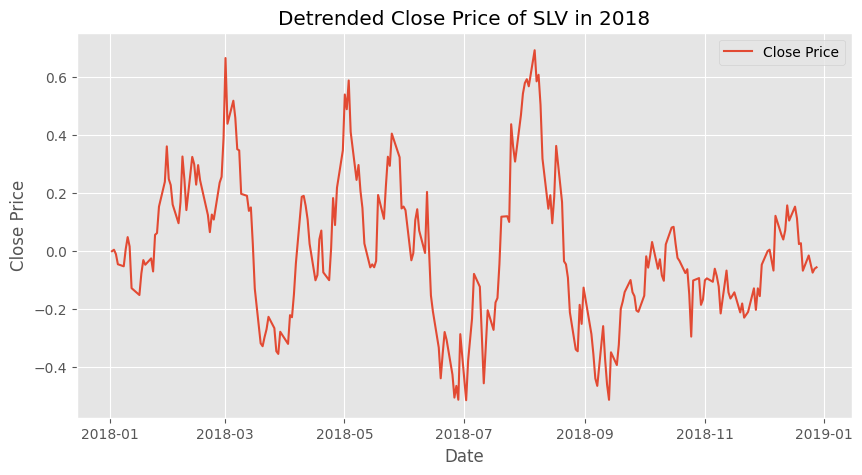

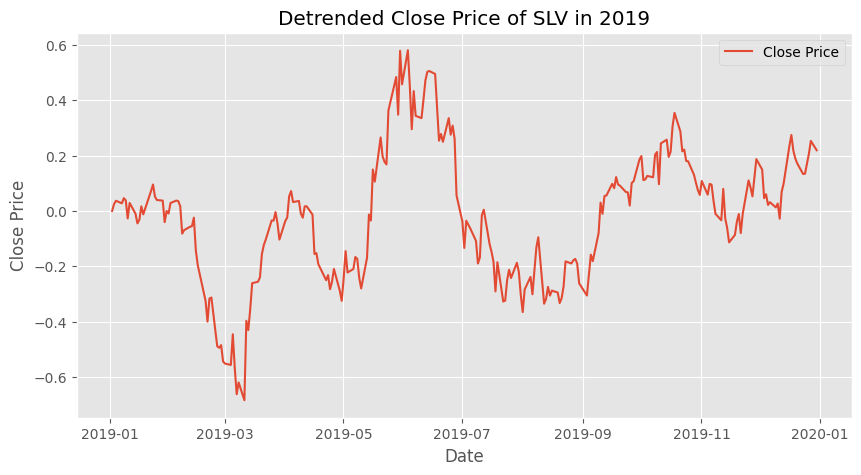

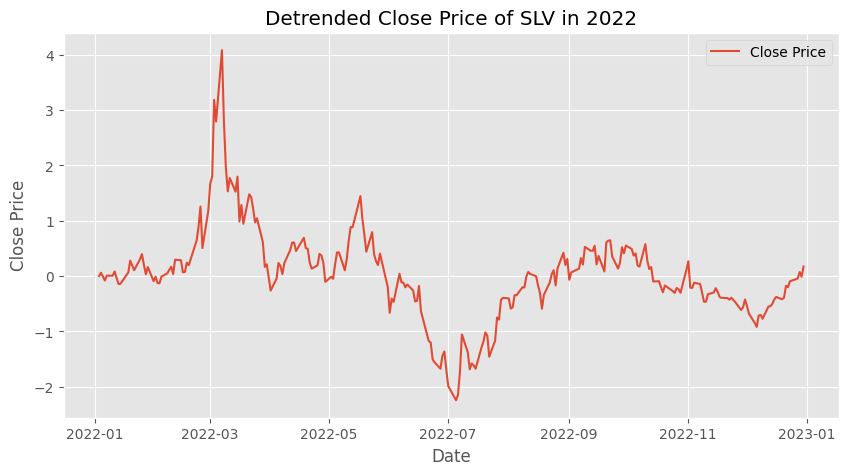

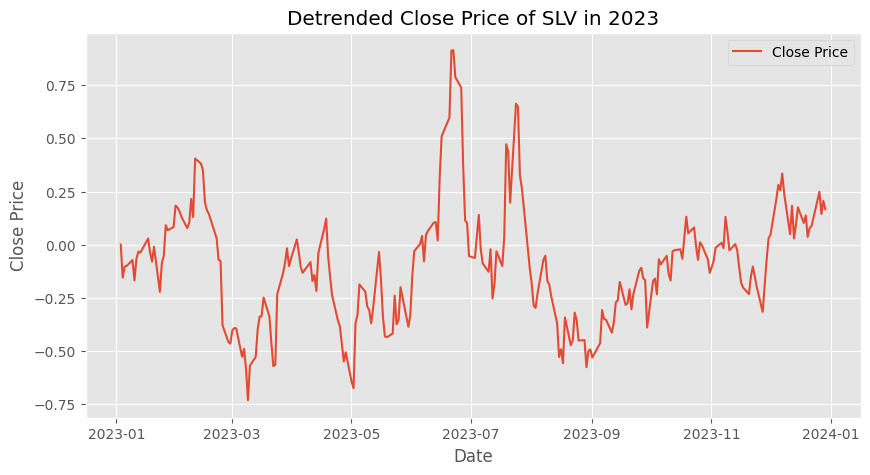

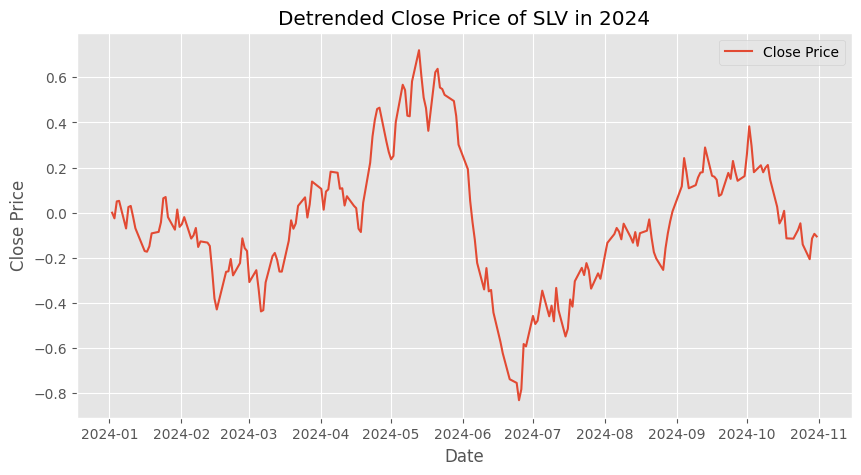

In [11]:

# Loop through each DataFrame in yearly_data and plot the Close price
for i, df in enumerate(yearly_data):
        # Detrend using a rolling mean (e.g., 30-day window)
    rolling_mean = df['Close'].rolling(window=30, min_periods=1).mean()
    df["Close"] = df['Close'] - rolling_mean
    plt.figure(figsize=(10, 5))  # Create a new figure for each plot
    plt.plot(df["Date"], df["Close"], label=f'Close Price')  # Plot Date vs Close
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Detrended Close Price of SLV in {dates[i][0][:4]}')  # Use the year from the dates list
    plt.grid(True)  # Add a grid for better readability
    plt.legend()  # Add a legend
    plt.show()  # Display the plot

C:\Users\vivek\AppData\Local\Temp\ipykernel_29356\1439342779.py:5: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


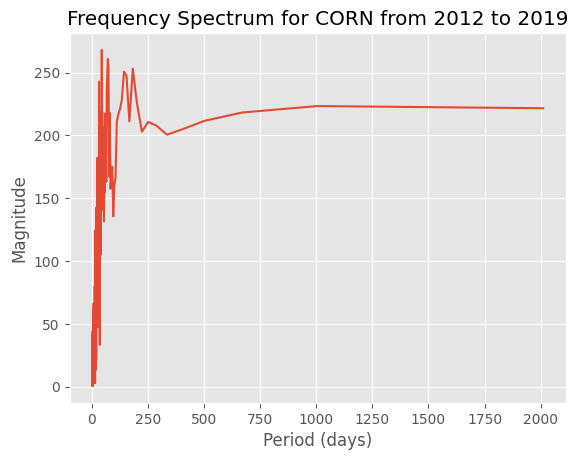

In [18]:
fft_result = np.fft.fft(detrended_prices_for_main)
frequencies = np.fft.fftfreq(len(detrended_prices_for_main), d=1)  # d=1 for daily data
magnitude = np.abs(fft_result)
# Convert frequencies to periods
periods = 1 / frequencies

# Plot only positive frequencies
positive_frequencies = frequencies > 0
plt.plot(periods[positive_frequencies], magnitude[positive_frequencies])
plt.xlabel('Period (days)')
plt.ylabel('Magnitude')
plt.title(f'Frequency Spectrum for {commodity} from 2012 to 2019')
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_29356\1463760875.py:9: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


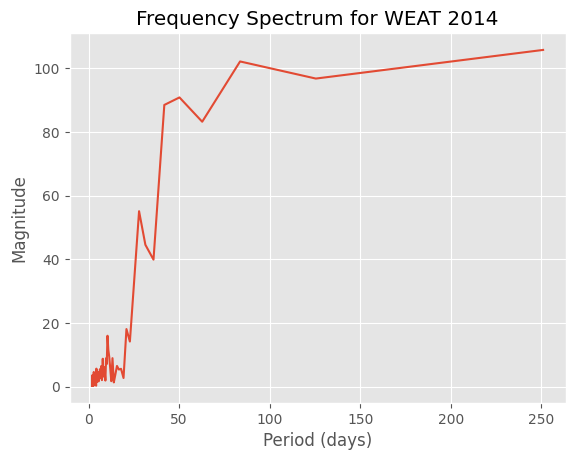

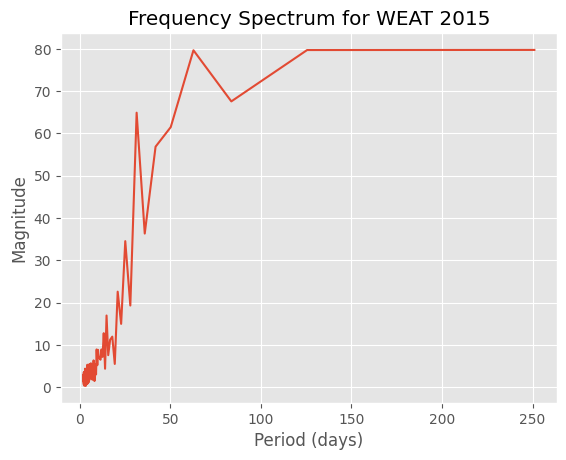

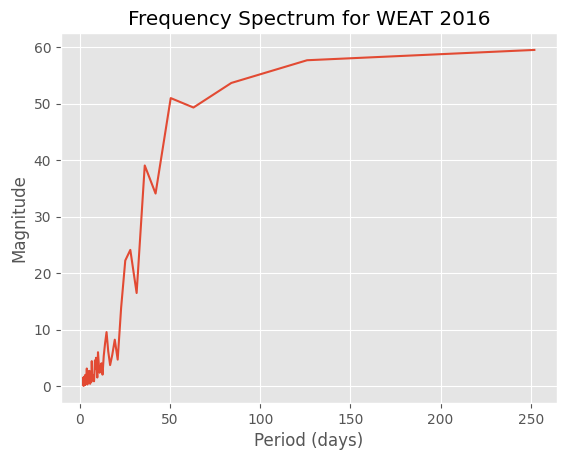

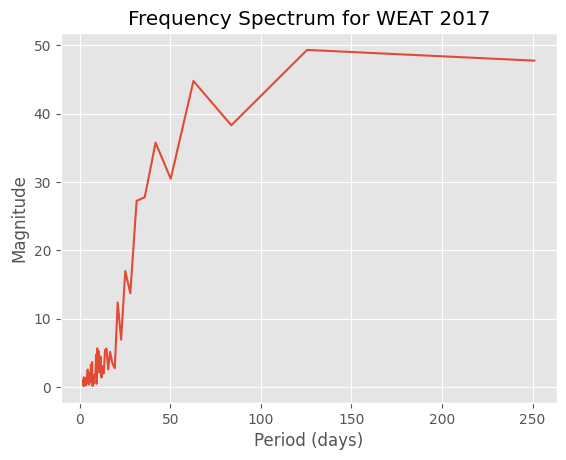

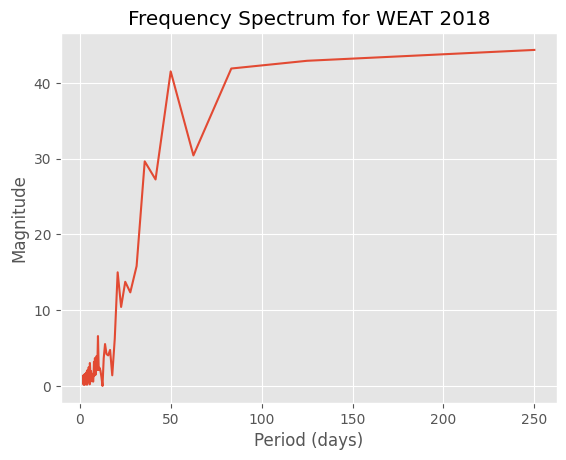

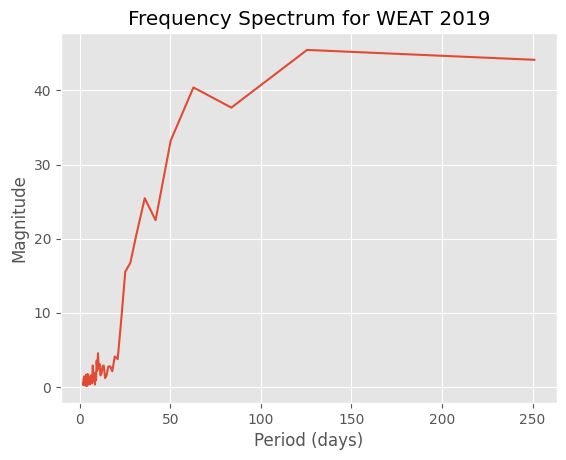

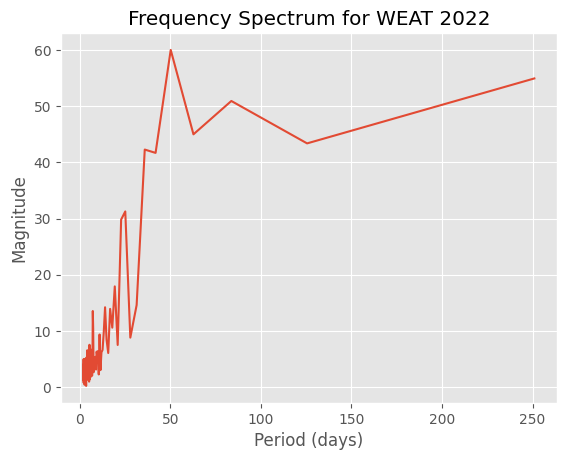

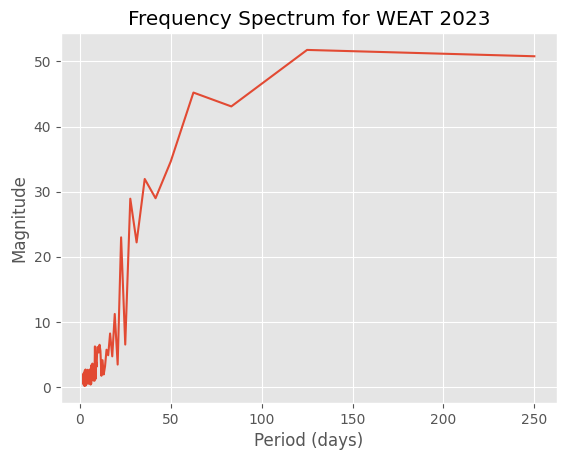

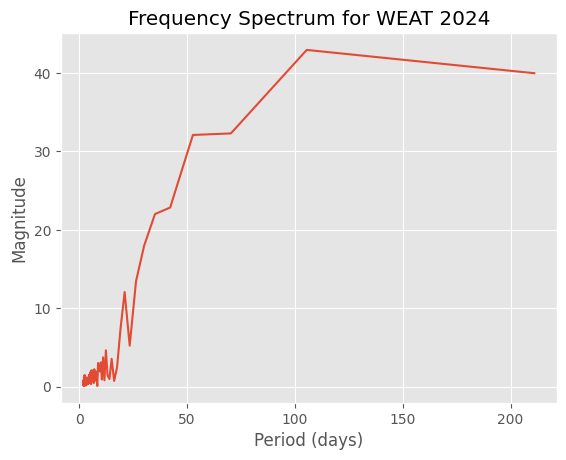

In [13]:

for i in range(len(yearly_detrended_prices)):
    adder = 2014
    if i>=6:
        adder = 2016
    fft_result = np.fft.fft(yearly_detrended_prices[i])
    frequencies = np.fft.fftfreq(len(yearly_detrended_prices[i]), d=1)  # d=1 for daily data
    magnitude = np.abs(fft_result)
    # Convert frequencies to periods
    periods = 1 / frequencies
    
    # Plot only positive frequencies
    positive_frequencies = frequencies > 0
    plt.plot(periods[positive_frequencies], magnitude[positive_frequencies])
    plt.xlabel('Period (days)')
    plt.ylabel('Magnitude')
    plt.title(f'Frequency Spectrum for {commodity} ' + str(i+adder))
    plt.show()

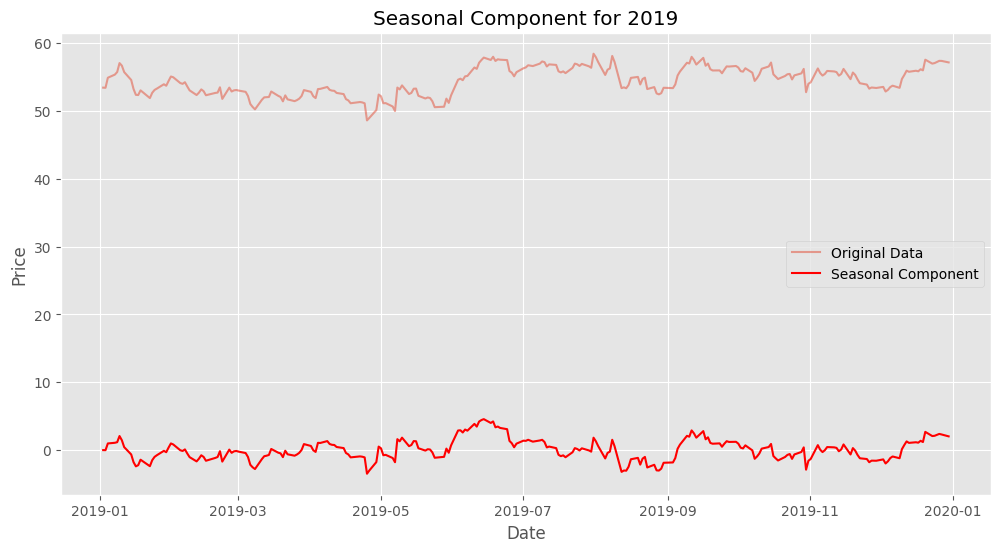

In [84]:
# Reconstruct seasonal component
seasonal_component = np.fft.ifft(fft_result).real

# Plot original and seasonal data
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Date'], yearly_data['Close'], label='Original Data', alpha=0.5)
plt.plot(yearly_data['Date'], seasonal_component, label='Seasonal Component', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Seasonal Component for 2019')
plt.legend()
plt.show()

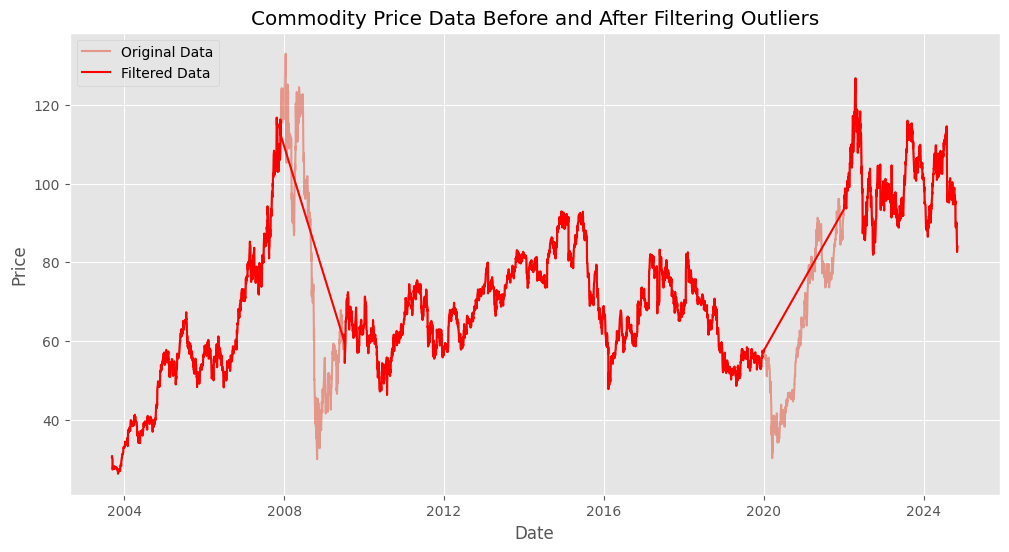

In [75]:

import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Original Data', alpha=0.5)

# Plot filtered data
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Filtered Data', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Commodity Price Data Before and After Filtering Outliers')
plt.legend()
plt.show()

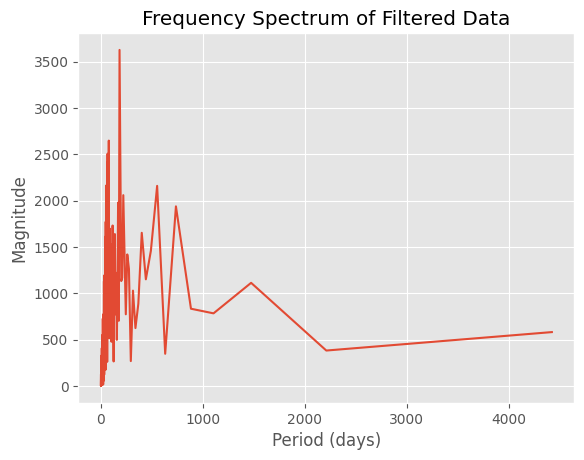

In [76]:
rolling_mean = filtered_data['Close'].rolling(window=30, min_periods=1).mean()
detrended_data = filtered_data['Close'] - rolling_mean

# Apply FFT
fft_result = np.fft.fft(detrended_data)
frequencies = np.fft.fftfreq(len(detrended_data), d=1)  # d=1 for daily data
magnitude = np.abs(fft_result)

# Plot frequency spectrum
positive_frequencies = frequencies > 0
periods = 1 / frequencies[positive_frequencies]
plt.plot(periods, magnitude[positive_frequencies])
plt.xlabel('Period (days)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Filtered Data')
plt.show()